In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sklearn
print(sklearn.__version__)

0.23.2


In [ ]:
#!pip install -U scikit-learn

In [3]:
data = pd.read_csv("Salary_Data.csv")

In [4]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
data.shape

(30, 2)

    - Correlation coefficient is used to measure how strong a relationship is between two variables
    - Its value varies from +1 to -1
    - A Value close to +1 establishes a linear relationship between two variables indicating an increase in one variable, results in an increase in the other
    - A  Value close to -1 also establishes a linear relationship between two variables indicating an increase in one variable, results in the decrease in the other
    - A value around 0 indicates there is no linear relationship between the variables

Below data is linear with -ve correlation
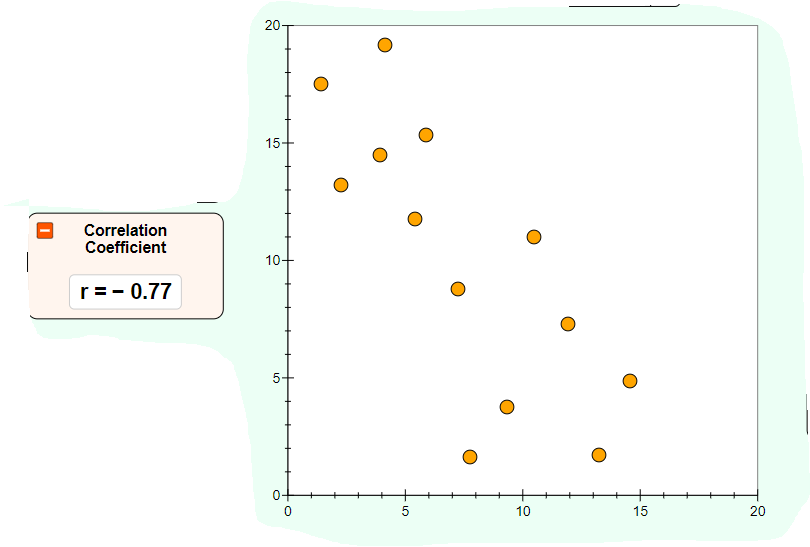

Below data is linear with +ve correlation
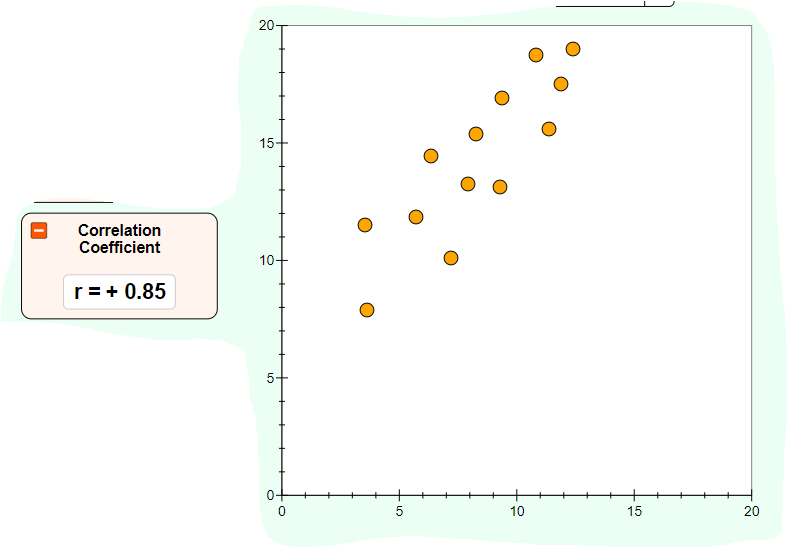

Below data is non linear
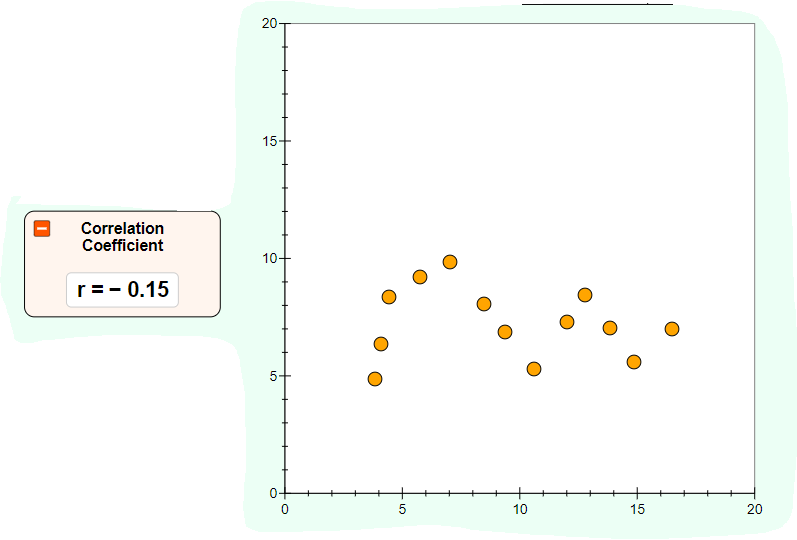

In [6]:
np.corrcoef(data.YearsExperience,data.Salary)[0][1]

0.9782416184887599

Text(0, 0.5, 'Salary')

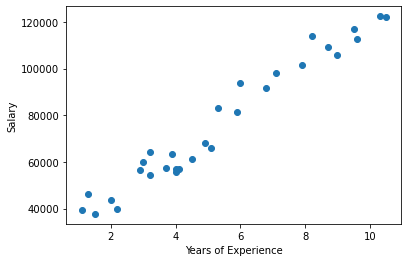

In [7]:
plt.scatter(data.YearsExperience,data.Salary)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

In [ ]:
#Store the features in X and target in y

In [10]:
X=data[['YearsExperience']]
y=data[['Salary']]

In [ ]:
#Alternative way to seperate out features and target
#X = data.iloc[:,:-1].values
#y = data.iloc[:,-1].values

In [11]:
#Split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [12]:
#hstack stacks two column arrys horizontally - side by side
pd.DataFrame(np.hstack((X_train,y_train)),columns=['Xtrain','ytrain']).head()

,Xtrain,ytrain
0,9.6,112635.0
1,4.0,55794.0
2,5.3,83088.0
3,7.9,101302.0
4,2.9,56642.0


In [13]:
print(X_train.shape,y_test.shape)

(24, 1) (6, 1)


In [14]:
#Create an instance of Linear regression
from sklearn.linear_model import LinearRegression
regr = LinearRegression()

In [15]:
#Train the model
regr.fit(X_train,y_train)

LinearRegression()

In [16]:
#Get the slope and intercept
print("a1 = ", regr.coef_)
print("a0 = ",regr.intercept_)

a1 =  [[9312.57512673]]
a0 =  [26780.09915063]


In [17]:
#Test the model : Make predictions on the trained model
y_pred = regr.predict(X_test)

In [18]:
#Reshape here converts a 1d vector into a 2d column vector
pd.DataFrame(np.hstack((X_test,y_test,y_pred.reshape(-1,1))),columns=['x_test','y_test','y_pred'])

,x_test,y_test,y_pred
0,1.5,37731.0,40748.961841
1,10.3,122391.0,122699.622956
2,4.1,57081.0,64961.657170
3,3.9,63218.0,63099.142145
4,9.5,116969.0,115249.562855
5,8.7,109431.0,107799.502753


In [19]:
from sklearn.metrics import mean_squared_error,r2_score

In [20]:
round(np.sqrt(mean_squared_error(y_test,y_pred)),4)

3580.9792

In [21]:
round(r2_score(y_test,y_pred),4)

0.9882

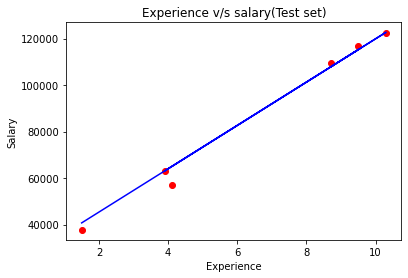

In [22]:
plt.scatter(X_test,y_test,color = 'red')
plt.plot(X_test,y_pred,color='blue')
plt.title("Experience v/s salary(Test set)")
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()